In [1]:
import math

In [2]:
from matplotlib import pyplot as plt

In [4]:
def newton( Manomal, e, epsilon):
    Eanomal = Manomal
    Eanomaldop = Manomal
    
    for i in  range(0, 100, 1): 
        if i == 0:
            Eanomaldop = Eanomal - ((Eanomal - e * math.sin(Eanomal) - Manomal) / (1 - e * math.cos(Eanomal))) 
        else: 
            Eanomaldop = Eanomal - ((Eanomal - e * math.sin(Eanomal) - Manomal) / ((fdop - f) / (tEdop - tE))) 
        if (abs(Eanomaldop - Eanomal) < epsilon): 
            return Eanomaldop
 
        f = Eanomal - e * math.sin(Eanomal) - Manomal
        fdop = Eanomaldop - e * math.sin(Eanomaldop) - Manomal
        tE = Eanomal
        tEdop = Eanomaldop
        Eanomal = Eanomaldop

In [63]:
PI = 3.14159
epsilon = 1e-6
rp = 460 + 6051.8 #в км
ra = 63000 + 6051.8 #в км
a = (ra + rp) / 2 #большая полуось
e = (ra - rp) / (2*a) #эксцентреситет
mu = 324859 #гравитационный параметр
p = a*(1 - pow(e, 2)) #фокальное расстояние
n = math.sqrt(mu / (a*a*a)) # средняя угловая скорость
#T = 24*3600
T = 2* PI * (math.sqrt(math.pow(a, 3) / mu))
y =[]
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []

for t in range(0, int(T), 1):  
    Manomal = n * t 
    Eanomal = newton(Manomal, e, epsilon)
    istanomal = (math.atan(math.sqrt((1 - e) / (1 + e)) * (math.tan(Eanomal / 2)))) * 2
    if (istanomal < 0):
        istanomal += 2 * PI
        
    r = (p / (1 + (e * math.cos(istanomal))))
    Vn = (math.sqrt(mu / p)) * (1 + e * math.cos(istanomal))
    Vr = (math.sqrt(mu / p)) * e * math.sin(istanomal)
    V = math.sqrt(pow(Vr, 2) + pow(Vn, 2)) 
    x1.append(r)
    x2.append(Vr)
    x3.append(Vn)
    x4.append(V)
    x5.append(t)
    


In [67]:
print(a)
print(p)
print(e)

37781.8
11901.27286788878
0.827647174036176


In [61]:
for t in range(0, int(T), 1):  
    Manomal = n * t 
    for Eanomal in range(0, 360, 1):
        istanomal = (math.atan(math.sqrt((1 - e) / (1 + e)) * (math.tan(Eanomal / 2)))) * 2
        if (istanomal < 0):
            istanomal += 2 * PI
        
        r = (p / (1 + (e * math.cos(istanomal))))
        Vn = (math.sqrt(mu / p)) * (1 + e * math.cos(istanomal))
        Vr = (math.sqrt(mu / p)) * e * math.sin(istanomal)
        V = math.sqrt(pow(Vr, 2) + pow(Vn, 2)) 
        x1.append(r)
        x2.append(Vr)
        x3.append(Vn)
        x4.append(V)
        x5.append(t)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


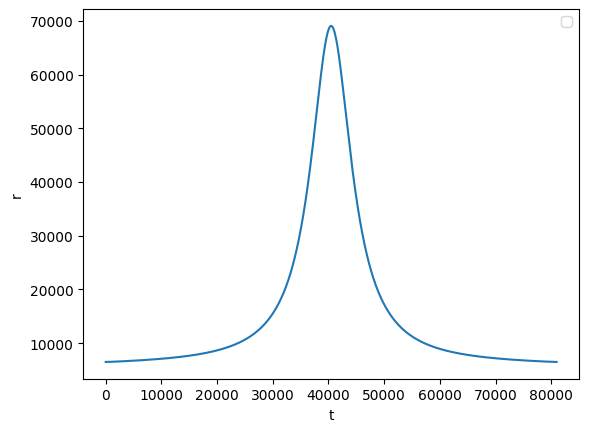

In [64]:
plt.plot(x5,x1)
plt.xlabel("t")
plt.ylabel("r")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


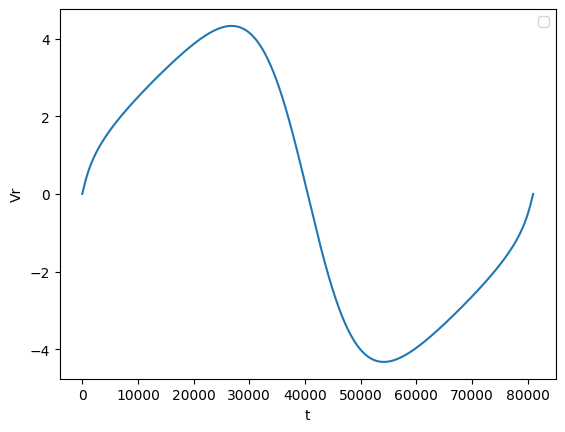

In [53]:
plt.plot(x5,x2)
plt.xlabel("t")
plt.ylabel("Vr")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


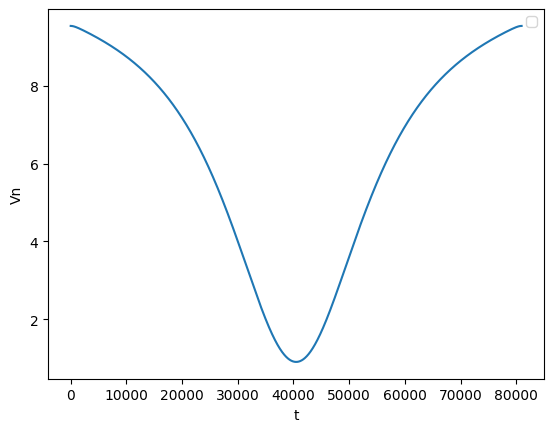

In [54]:
plt.plot(x5,x3)
plt.xlabel("t")
plt.ylabel("Vn")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


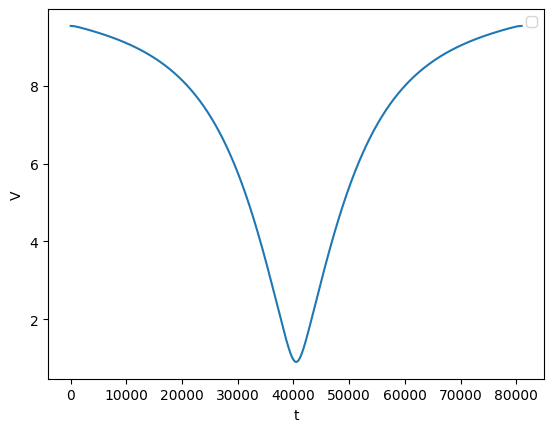

In [55]:
plt.plot(x5,x4)
plt.xlabel("t")
plt.ylabel("V")
plt.legend()

In [68]:
print(max(x4))

9.548674837215609
